Project

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
import numpy as np

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\julia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# read csv, and obtain the first four columns of the data
news_df = pd.read_csv("news.csv", low_memory = False, encoding='utf-8-sig')
news_df = news_df.iloc[:, :4]
news_df.head()

,news_id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
# create a new column which contains the length of the texts
news_df["len_text"] = news_df["text"].str.len()

# return summary statistics for data exploration
news_df.describe()

,len_text
count,6929.000000
mean,4251.583345
std,4412.048384
min,1.000000
25%,1228.000000
50%,3247.000000
75%,5861.000000
max,32727.000000


C:\Users\julia\AppData\Local\Temp\ipykernel_31636\3968948934.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df["label"] = news_df["label"].replace(["FAKE"], 0)
C:\Users\julia\AppData\Local\Temp\ipykernel_31636\3968948934.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df["label"] = news_df["label"].replace(["REAL"], 1)


Text(0, 0.5, 'Frequency')

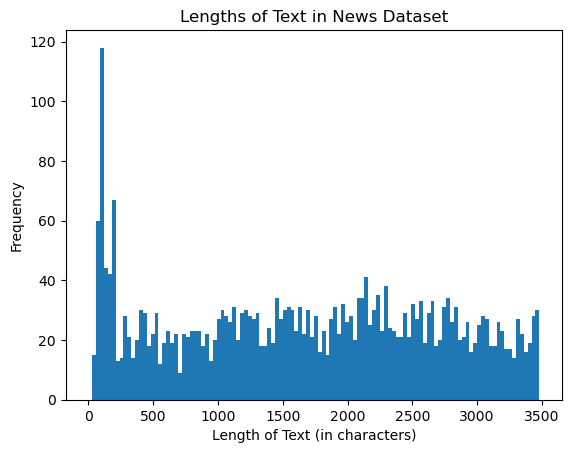

In [4]:
# cleaning the data
# drop rows with null values, and only have articles with more than fifty characters
article_df = news_df.dropna()
news_df = article_df[article_df["text"].str.len() >= 50]
news_df[pd.to_numeric(news_df["news_id"], errors='coerce').notnull()]

# convert label column to ones and zeros (for machine learning)
news_df["label"] = news_df["label"].replace(["FAKE"], 0)
news_df["label"] = news_df["label"].replace(["REAL"], 1)

# make sure news_df is a digit
news_df = news_df[news_df['news_id'].apply(lambda x: str(x).isdigit())]

# data exploration
# plot histogram showing the ranges of the lengths of texts
plt.hist(news_df["len_text"], bins=range(0, 3500, 30))
plt.title("Lengths of Text in News Dataset")
plt.xlabel("Length of Text (in characters)")
plt.ylabel("Frequency")

In [5]:
# data exploration continued, examine what proportion of news articles are real versus fake
fake_len = len(news_df[news_df["label"] == 0])
real_len = len(news_df[news_df["label"] == 1])
print("The percentage of real news articles in the dataset is ", round(real_len / (real_len + fake_len), 4))
print("The percentage of fake news articles in the dataset is ", round(fake_len / (fake_len + real_len), 4))

The percentage of real news articles in the dataset is  0.5041
The percentage of fake news articles in the dataset is  0.4959


In [6]:
# machine learning
# create X and y data
X = list(news_df["title"] + news_df["text"] + news_df["news_id"])
y = news_df[["label"]]
y=y.astype('int')

# transform text data using count vectorizer and tfidf transformer
vectorizer = CountVectorizer(lowercase=False)
X = vectorizer.fit_transform(X).toarray()
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

# split data into train test and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
y_train = y_train.values.ravel()

In [7]:
classifier = RandomForestClassifier(n_estimators=100, random_state=0, verbose=3)
classifier.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.4min finished


RandomForestClassifier(random_state=0, verbose=3)

In [8]:
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9059011164274322


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


## There are some cells we have not running in our program, which are the cells involving hyperparameter testing. These cells took over an hour to run, and we just have the code commented below, and in the cell below we ran the most optimal parameters the model gave us

In [9]:
# params = {'bootstrap': [False], 'max_depth': [100], 'max_features': ['auto'],
#           'min_samples_leaf': [1], 'min_samples_split': [5], 'n_estimators': [100]}
# initialize Grid Search with Cross Validation
# svm_grid = GridSearchCV(estimator = classifier, param_grid = params, cv=5, return_train_score=False)
# svm_grid.fit(X_train, y_train)

# print(svm_grid.best_params_) #print the best parameters
# print(svm_grid.best_score_)  #print the best score

In [10]:
classifier = RandomForestClassifier(n_estimators=100, random_state=0, bootstrap=False, max_depth=100, max_features='auto', min_samples_leaf=1, min_samples_split=5, verbose=3)
classifier.fit(X_train, y_train)

C:\Users\julia\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.4min finished


RandomForestClassifier(bootstrap=False, max_depth=100, max_features='auto',
                       min_samples_split=5, random_state=0, verbose=3)

In [11]:
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


0.89792663476874


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [13]:
# try our second classifer, gaussianNB, and fit data
classifier = GaussianNB()
classifier.fit(X_train, y_train)

MemoryError: Unable to allocate 4.31 GiB for an array with shape (6265, 92233) and data type float64

In [ ]:
# get prediction scores
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

# the accuracy of this classifier was already too low, we still applied parameters,
# and still count random forest classifer is still most optimal

# our code is below
# params = {'priors': [None],
#    'var_smoothing': [0.00000001, 0.000000001, 0.00000001]
# }
#initialize Grid Search with Cross Validation
# svm_grid = GridSearchCV(estimator = classifier, param_grid = params, cv=5, return_train_score=False, verbose=3)
# svm_grid.fit(X_train, y_train)

# print(svm_grid.best_params_) #print the best parameters
# print(svm_grid.best_score_)  #print the best score

In [ ]:
# set classifier to KNN
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(X_train, y_train)  

In [ ]:
# get predictions
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

In [ ]:
# although the accuracy was not as good as random forest classifier, we still left it and the
# hyperparameter testing because it was efficient to run over and over while testing our code
params = {'leaf_size': [1,30,50],
            'n_neighbors': [1,30],
            'p':[1,2]
}
#initialize Grid Search with Cross Validation
svm_grid = GridSearchCV(estimator = classifier, param_grid = params, cv=5, return_train_score=False, verbose=3)
svm_grid.fit(X_train, y_train)

print(svm_grid.best_params_) #print the best parameters
print(svm_grid.best_score_)  #print the best score